Cargar el dataset FuelConsumptionCo2.csv en numpy

lo habitual es cargarlo con pandas

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import random
import pickle as pkl

In [2]:
with open("../Data/FUELCONSUMPTION_CITY.pkl", "br") as f:
    city_consumption = pkl.load(f)
    
city_consumption

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9])

In [3]:
print(city_consumption.dtype)

float64


In [4]:

# Cargamos la columna 8 del CSV en un array de numpy: es la columna de consumo de combustible por ciudad
# city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1) # float64
city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)

city_consumption
road_consumption

array([ 6.7,  7.7,  5.8, ...,  9.8,  9.3, 10.2], dtype=float32)

In [5]:
print(city_consumption.dtype)
print(city_consumption.shape)

float32
(1067,)


In [6]:
manufacturers = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      dtype='<U13')

In [7]:
print(manufacturers.dtype)
print(manufacturers.shape)

<U13
(1067,)


In [8]:
print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en carretera: {np.mean(road_consumption)}")



print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2)}")
print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2)}")


print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2):.2f}")
print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2):.2f}")

Consumo medio en ciudad: 13.29653263092041
Consumo medio en carretera: 9.474601745605469
Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 13.300000190734863
Consumo medio en ciudad: 13.300000190734863
Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 13.30
Consumo medio en ciudad: 13.30


In [9]:
print(f"Mediana de combustible en ciudad: {np.median(city_consumption)}")
print(f"Mediana de combustible en carretera: {np.median(road_consumption)}")



Mediana de combustible en ciudad: 12.600000381469727
Mediana de combustible en carretera: 8.800000190734863


In [10]:
print(f"Coche que más combustible consume en ciudad: {np.max(city_consumption)}")
print(f"Coche que más combustible consume en carretera: {np.max(road_consumption)}")




Coche que más combustible consume en ciudad: 30.200000762939453
Coche que más combustible consume en carretera: 20.5


In [11]:
print(f"Coche que menos combustible consume en ciudad: {np.min(city_consumption)}")
print(f"Coche que menos combustible consume en carretera: {np.min(road_consumption)}")



Coche que menos combustible consume en ciudad: 4.599999904632568
Coche que menos combustible consume en carretera: 4.900000095367432


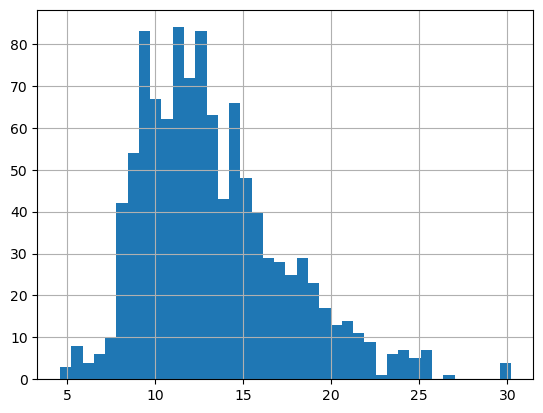

In [12]:
plt.hist(city_consumption, bins=40);
plt.grid()

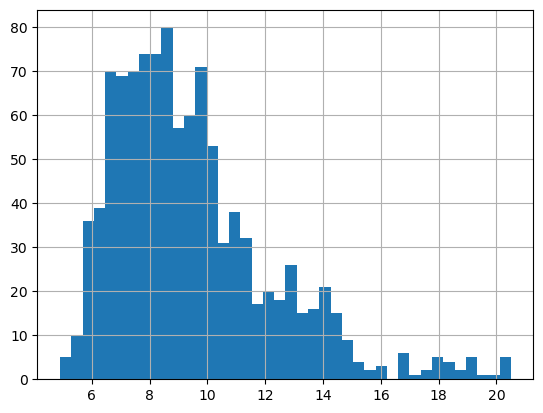

In [13]:
plt.hist(road_consumption, bins=40);
plt.grid()

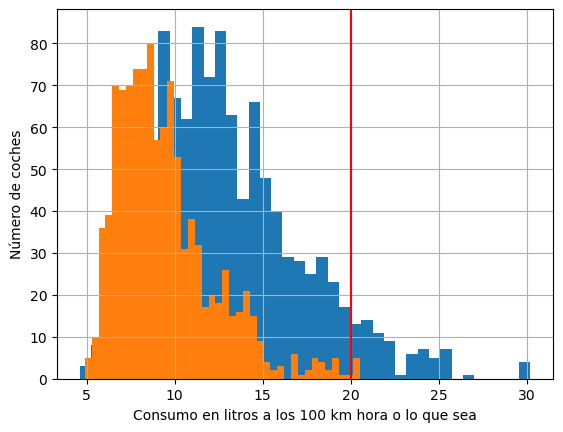

In [14]:
plt.hist(city_consumption, bins=40);
plt.hist(road_consumption, bins=40);
plt.xlabel("Consumo en litros a los 100 km hora o lo que sea")
plt.ylabel("Número de coches")
plt.axvline(20, color='red') # limite de compra 
plt.grid()

In [15]:

print(np.quantile(a = city_consumption, 
            q = 0.5,   # 50% === mediana sirve para calcular valores anómalos
            interpolation = "lower"))

print(np.median(city_consumption))



12.6
12.6


In [16]:
print(np.quantile(a = city_consumption, 
            q = [0.25, 0.50, 0.75],
            interpolation = "lower"))

# primer quartil (Q1): 10.2 L/ 100 km - El 25% de los coches consumen menos de 10,2 litros
# Mediana (Q2): 12,6 L / 100 km - El 50% de los coches consumen menos de 12,6 litros
# Tercer cuartil (Q3): 15,5 L / 100 km - El 75% de los coches consumen menos de 15,5 litros
# Esto nos intereasa para poder detectar calores anómalis o que están muy alejados del 50% de los datos


[10.2 12.6 15.5]


In [17]:
# np.where
# Filtros: máscara booleana
city_consumption[city_consumption >= 26]
# df[df["city_consumption"] >= 26]

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [18]:
# rango
print(f"Rango consumo ciudad: {np.max(city_consumption) - np.min(city_consumption)}")
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(city_consumption)}")


Rango consumo ciudad: 25.600000381469727
Rango consumo carretera: 15.899999618530273


In [19]:
# rango intercuartilico IQR: am,plitud entre el primer cuartil (Q1) y el tercer quartil (Q3): Vemos la variabilidad central de los datos
# lo usaremos para calcular valores que sean anómalos, que están myuy alejados de ese 50% central de los datos
# como están distribuidos los datos alrededor de la mediana
# 1.5 veces el IQR alejado se puede considerar un outlier o 
print(np.quantile(a = city_consumption, q = [0.25], interpolation = "lower"))
print(np.quantile(a = city_consumption, q = [0.50], interpolation = "lower"))
print(np.quantile(a = city_consumption, q = [0.75], interpolation = "lower"))

Q1 = np.quantile(a = city_consumption, q = [0.25], interpolation = "lower")
Q2 = np.quantile(a = city_consumption, q = [0.50], interpolation = "lower")
Q3 = np.quantile(a = city_consumption, q = [0.75], interpolation = "lower")

IQR = Q3 - Q1
print(IQR)

# def remove_outliers(array):
    

[10.2]
[12.6]
[15.5]
[5.3]


10.2
15.5


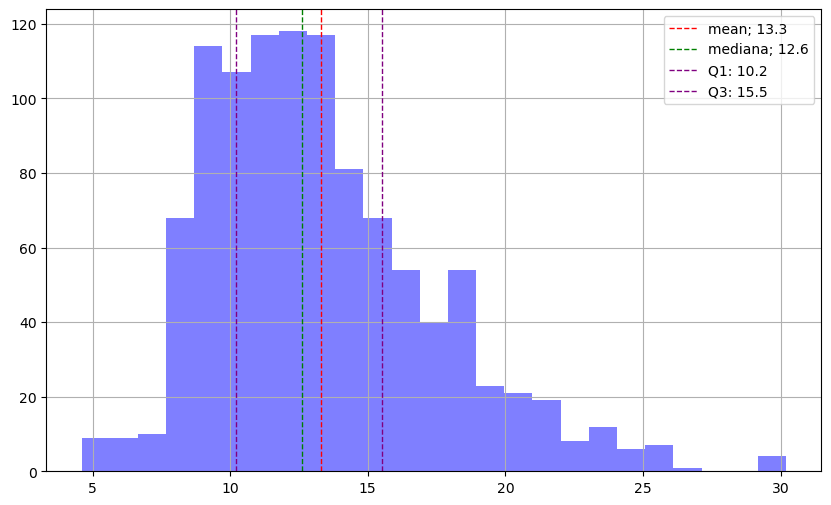

In [25]:
# pintar media, mediana, q1, q3, min, max en un histograma


city_mean = np.mean(city_consumption)
city_median = np.median(city_consumption)
city_min = np.min(city_consumption)
city_max = np.max(city_consumption)
city_q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
city_q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")
print(city_q1)
print(city_q3)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=25, color='blue', alpha=0.5)
plt.axvline(city_mean, color='red', linestyle='dashed', linewidth=1, label=f'mean; {city_mean:.1f}')
plt.axvline(city_median, color='green', linestyle='dashed', linewidth=1, label=f'mediana; {city_median:.1f}')
#plt.axvline(city_min, color='black', linestyle='dashed', linewidth=1, label=f'min; {city_min:.1f}')
#plt.axvline(city_max, color='black', linestyle='dashed', linewidth=1, label=f'max; {city_max:.1f}')
plt.axvline(city_q1, color='purple', linestyle='dashed', linewidth=1, label=f'Q1: {city_q1:.1f}')
plt.axvline(city_q3, color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {city_q3:.1f}')
plt.legend()
plt.grid()
plt.show()





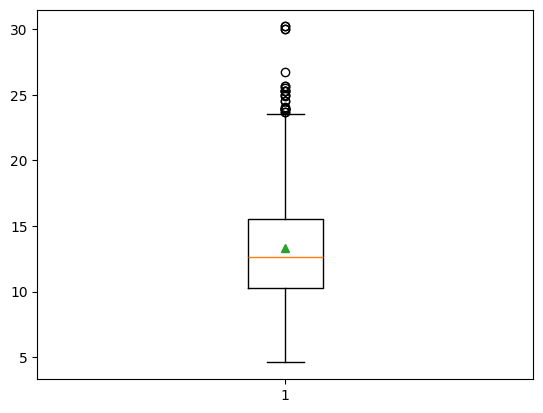

In [82]:
# boxplot
# punto y coma se pone al final para evitar que muestre textos encima del grafico, solo cuando es la ultima linea de la celda (y solo para Jupyter)
plt.boxplot(city_consumption, showmeans=True);

In [76]:
# Filtrar usando percentiles
#distintos medios (alias) de hacer lo mismo
#print(np.quantile(city_consumption, 0.5))
#print(np.percentile(city_consumption, 50))

# filtramos un porcentaje de los coches
percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil_10: {percentil_10}")
print(f"percentil_90: {percentil_90}")


#Coches en el 10% inferior (10% de coches que menos consumen)
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]

# 10% de coches que más consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
print(coches_menor_consumo.shape)
print(f"media: {np.mean(coches_menor_consumo)}")
print("10 % coches mayor consumo")
print(coches_mayor_consumo.shape)
print(f"media: {np.mean(coches_mayor_consumo)}")



percentil_10: 8.699999809265137
percentil_90: 18.799999237060547
10 % coches menor consumo
(114,)
media: 7.8307013511657715
10 % coches mayor consumo
(115,)
media: 21.574783325195312


In [22]:
# Varianza: mide la dispersion de los consumos con respecto a la media
np.var(city_consumption)

16.804516

In [26]:
# desviacion estandar: raiz cuadrada de la varianza, permite una mejor interpretación ya que estaría en las mismas unidades

np.std(city_consumption)
# de media, los consumops se desvian 4,1 litros de la media 

4.0993314

In [40]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      dtype='<U13')

In [42]:
from collections import Counter
contador = Counter(manufacturers) # obtenemos como un diccionario

# contador.most_common(5)  # da los 5 fabricantes de coches más comunes en este dataset
top_10 = contador.most_common(10)
for fabricante, count in top_10:
    print(f"Fabricante {fabricante} tiene {count} coches")

# podemos hacer una grafica con plt.bar
# en pandas sería: sns.countplot()



Fabricante FORD tiene 90 coches
Fabricante CHEVROLET tiene 86 coches
Fabricante BMW tiene 64 coches
Fabricante MERCEDES-BENZ tiene 59 coches
Fabricante AUDI tiene 49 coches
Fabricante GMC tiene 49 coches
Fabricante TOYOTA tiene 49 coches
Fabricante PORSCHE tiene 44 coches
Fabricante VOLKSWAGEN tiene 42 coches
Fabricante DODGE tiene 39 coches


In [72]:
from collections import Counter
contador = Counter(manufacturers)
contador.items()
for i in contador.items():
    print(f"{i[0]} {i[1]}")

#for fabricante, count in contador:
#    print(f"Fabricante {fabricante} tiene {count} coches")
    
for position, vehicle in enumerate(contador.items()):    
    
    if 20 > position > 10:
        print(f"{vehicle[0]} {vehicle[1]}")

ACURA 12
ASTON MARTIN 7
AUDI 49
BENTLEY 8
BMW 64
BUICK 16
CADILLAC 32
CHEVROLET 86
CHRYSLER 19
DODGE 39
FIAT 10
FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3
LAND ROVER 19
LEXUS 22
LINCOLN 11
MASERATI 6
MAZDA 27
MERCEDES-BENZ 59
MINI 36
MITSUBISHI 16
NISSAN 33
PORSCHE 44
RAM 13
ROLLS-ROYCE 7
SCION 9
SMART 2
SRT 2
SUBARU 23
TOYOTA 49
VOLKSWAGEN 42
VOLVO 11
FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3


In [46]:
top_10

[('FORD', 90),
 ('CHEVROLET', 86),
 ('BMW', 64),
 ('MERCEDES-BENZ', 59),
 ('AUDI', 49),
 ('GMC', 49),
 ('TOYOTA', 49),
 ('PORSCHE', 44),
 ('VOLKSWAGEN', 42),
 ('DODGE', 39)]

In [45]:
# plt.bar()
fabricantes, conteos = zip(*top_10) # tb lo podemos sacar en la celda anterior, dentro del blcle, haciendo append a una lista de cada


print(fabricantes)
print(conteos)


('FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'AUDI', 'GMC', 'TOYOTA', 'PORSCHE', 'VOLKSWAGEN', 'DODGE')
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


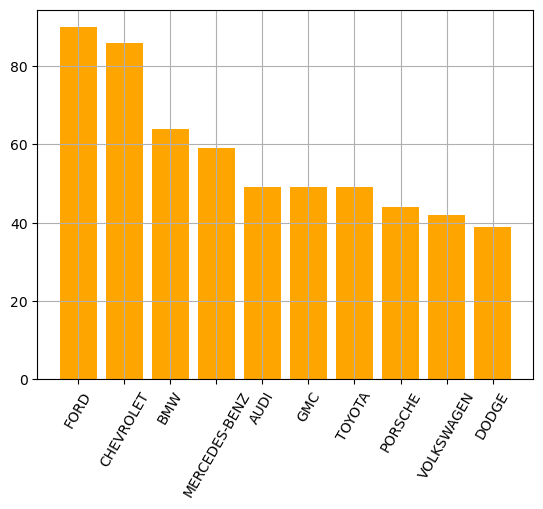

In [60]:
#plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos, color='orange')
plt.xticks(rotation=60);

plt.grid()


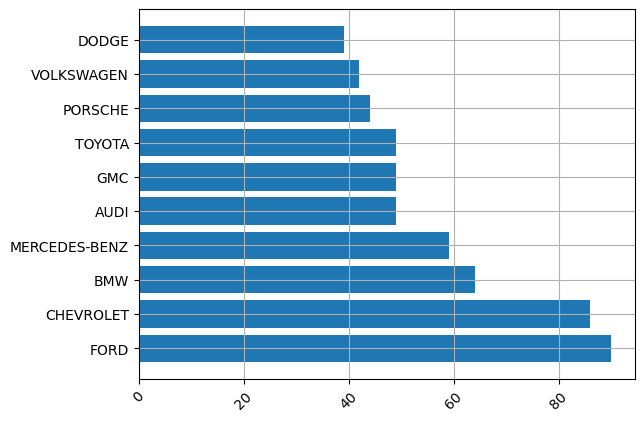

In [59]:
#plt.figure(figsize=(12, 8))
plt.barh(fabricantes, conteos)
plt.xticks(rotation=45);
plt.grid()


In [61]:
# moda de manufacturers
stats.mode(manufacturers)




TypeError: Argument `a` is not recognized as numeric. Support for input that cannot be coerced to a numeric array was deprecated in SciPy 1.9.0 and removed in SciPy 1.11.0. Please consider `np.unique`.

In [73]:
# metodo para ver outliers

def filtrar_outliers(array)

    # calcular el Q1
    # calcular el Q3
    # calcular IQR
    # Filtro sobre array de 1.5 veces el IQR para limite inferior y limite superior
    # retornar array_filtrado
    
    pass

SyntaxError: expected ':' (1364102751.py, line 3)

In [62]:
city_consumption # 1067
filtrados = filtrar_outliers

NameError: name 'filtrar_outliers' is not defined